In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [3]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

In [4]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
y_test_all

[]

In [7]:
for iterationNumber in range(7):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [8]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [9]:
for i in range(7):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [10]:
label_convert

['chr_x',
 'chr_01',
 'chr_02',
 'chr_03',
 'chr_04',
 'chr_05',
 'chr_06',
 'chr_07',
 'chr_08',
 'chr_09',
 'chr_10',
 'chr_11',
 'chr_12',
 'chr_13',
 'chr_14',
 'chr_15',
 'chr_16',
 'chr_17',
 'chr_18',
 'chr_19',
 'chr_20',
 'chr_21',
 'chr_22',
 'chr_y',
 'chr_18_p11_deletion',
 'chr_18_q10_isochromosome',
 'chr_9_inversion',
 'chr_5_p14_deletion',
 'chr_x_isochromosome',
 'chr_x_p22_cnv',
 'chr_x_q21_cnv',
 'chr_x_q22_deletion']

# Classification Report

## Accuracy

In [11]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.8618598382749326


## Precision, Recall, and F1

In [12]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

                          precision    recall  f1-score   support

                   chr_x       0.79      0.83      0.81       189
                  chr_01       0.91      0.88      0.90        73
                  chr_02       0.84      0.93      0.88        70
                  chr_03       1.00      0.93      0.96        70
                  chr_04       0.88      0.91      0.90        70
                  chr_05       0.84      0.84      0.84       201
                  chr_06       0.93      0.91      0.92        70
                  chr_07       0.94      0.86      0.90        70
                  chr_08       0.92      0.85      0.88        71
                  chr_09       0.80      0.82      0.81       260
                  chr_10       0.94      0.94      0.94        70
                  chr_11       0.89      0.90      0.89        70
                  chr_12       0.91      0.90      0.91        69
                  chr_13       0.90      0.89      0.89        70
         

## Confusion Matrix

In [13]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,156,1,0,0,0,1,1,0,0,14,...,0,0,0,1,6,0,1,5,1,0
chr_01,0,64,5,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
chr_02,0,4,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_03,0,0,0,65,1,0,1,1,0,0,...,0,0,0,0,0,0,2,0,0,0
chr_04,0,0,0,0,64,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_05,2,0,2,0,4,169,0,0,0,4,...,0,0,0,0,0,19,0,0,0,0
chr_06,1,0,1,0,0,0,64,1,0,1,...,0,0,0,0,0,0,1,0,0,0
chr_07,1,0,0,0,0,0,1,60,0,1,...,0,1,0,0,5,0,0,0,0,0
chr_08,2,0,0,0,0,0,0,0,60,5,...,0,0,0,0,1,0,0,1,0,0
chr_09,12,0,1,0,2,2,1,1,4,214,...,0,0,0,0,13,0,0,4,0,1


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [14]:
subtotal = [0] * 32  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [15]:
cm_r = []
for i in range(32):
    cm_r.append(cm[i]/subtotal[i])

In [16]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,0.825397,0.005291,0.000000,0.000000,0.000000,0.005291,0.005291,0.000000,0.000000,0.074074,...,0.000000,0.000000,0.000000,0.005291,0.031746,0.000000,0.005291,0.026455,0.005291,0.000000
chr_01,0.000000,0.876712,0.068493,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.000000
chr_02,0.000000,0.057143,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000
chr_03,0.000000,0.000000,0.000000,0.928571,0.014286,0.000000,0.014286,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000
chr_04,0.000000,0.000000,0.000000,0.000000,0.914286,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000
chr_05,0.009950,0.000000,0.009950,0.000000,0.019900,0.840796,0.000000,0.000000,0.000000,0.019900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.094527,0.000000,0.000000,0.000000,0.000000
chr_06,0.014286,0.000000,0.014286,0.000000,0.000000,0.000000,0.914286,0.014286,0.000000,0.014286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000
chr_07,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.857143,0.000000,0.014286,...,0.000000,0.014286,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
chr_08,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845070,0.070423,...,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.014085,0.000000,0.000000
chr_09,0.046154,0.000000,0.003846,0.000000,0.007692,0.007692,0.003846,0.003846,0.015385,0.823077,...,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.015385,0.000000,0.003846


### 3.10.6 Precision (查准率）

In [17]:
subtotal_predict = [0] * 32  
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [18]:
cm_p = []
for i in range(32):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [19]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,0.791878,0.000000,0.000000,0.000000,0.000000,0.010152,0.005076,0.005076,0.010152,0.060914,...,0.000000,0.000000,0.000000,0.000000,0.010152,0.000000,0.020305,0.071066,0.005076,0.005076
chr_01,0.014286,0.914286,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000
chr_02,0.000000,0.064935,0.844156,0.000000,0.000000,0.025974,0.012987,0.000000,0.000000,0.012987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.025974,0.000000,0.000000,0.000000
chr_03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr_04,0.000000,0.013699,0.000000,0.013699,0.876712,0.054795,0.000000,0.000000,0.000000,0.027397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000
chr_05,0.005000,0.005000,0.000000,0.000000,0.025000,0.845000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.095000,0.005000,0.005000,0.000000,0.005000
chr_06,0.014493,0.000000,0.000000,0.014493,0.000000,0.000000,0.927536,0.014493,0.000000,0.014493,...,0.000000,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000
chr_07,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.015625,0.937500,0.000000,0.015625,...,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000
chr_08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.923077,0.061538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385
chr_09,0.052239,0.000000,0.000000,0.000000,0.000000,0.014925,0.003731,0.003731,0.018657,0.798507,...,0.000000,0.003731,0.000000,0.007463,0.052239,0.000000,0.000000,0.014925,0.000000,0.014925


#### Heat Map: Number

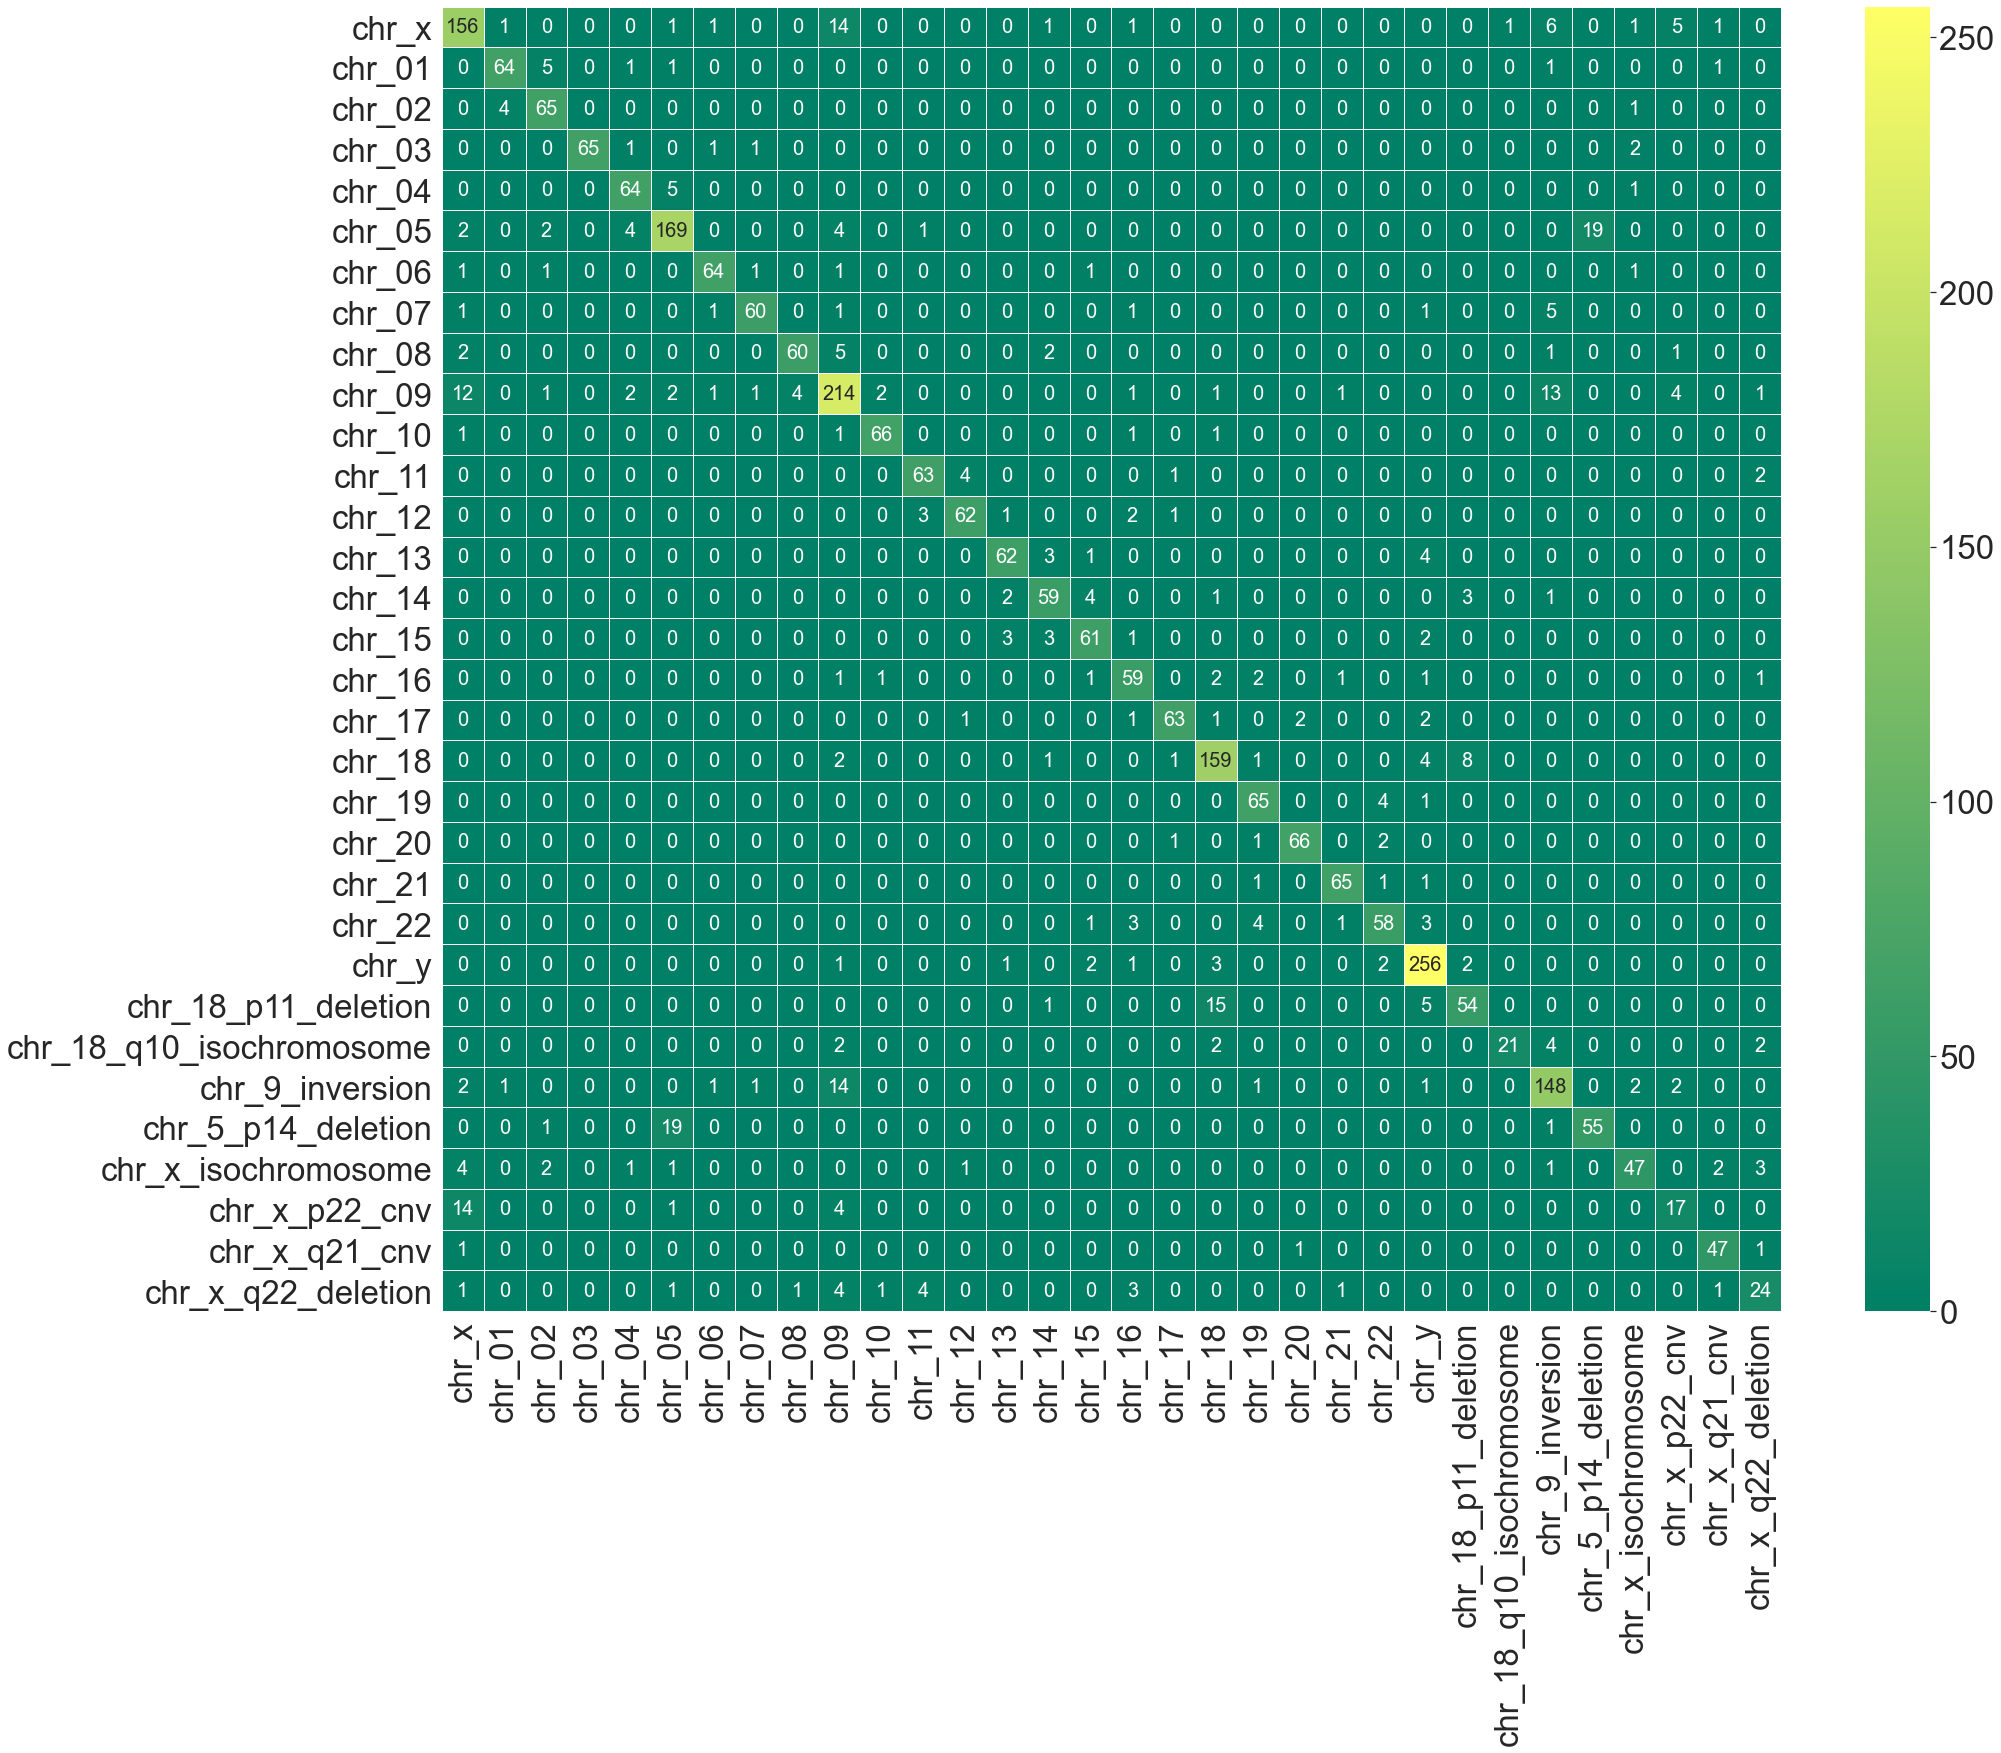

In [29]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, fmt = 'g', # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 1)

#### Heat Map of Recall: Rate (important!!!)

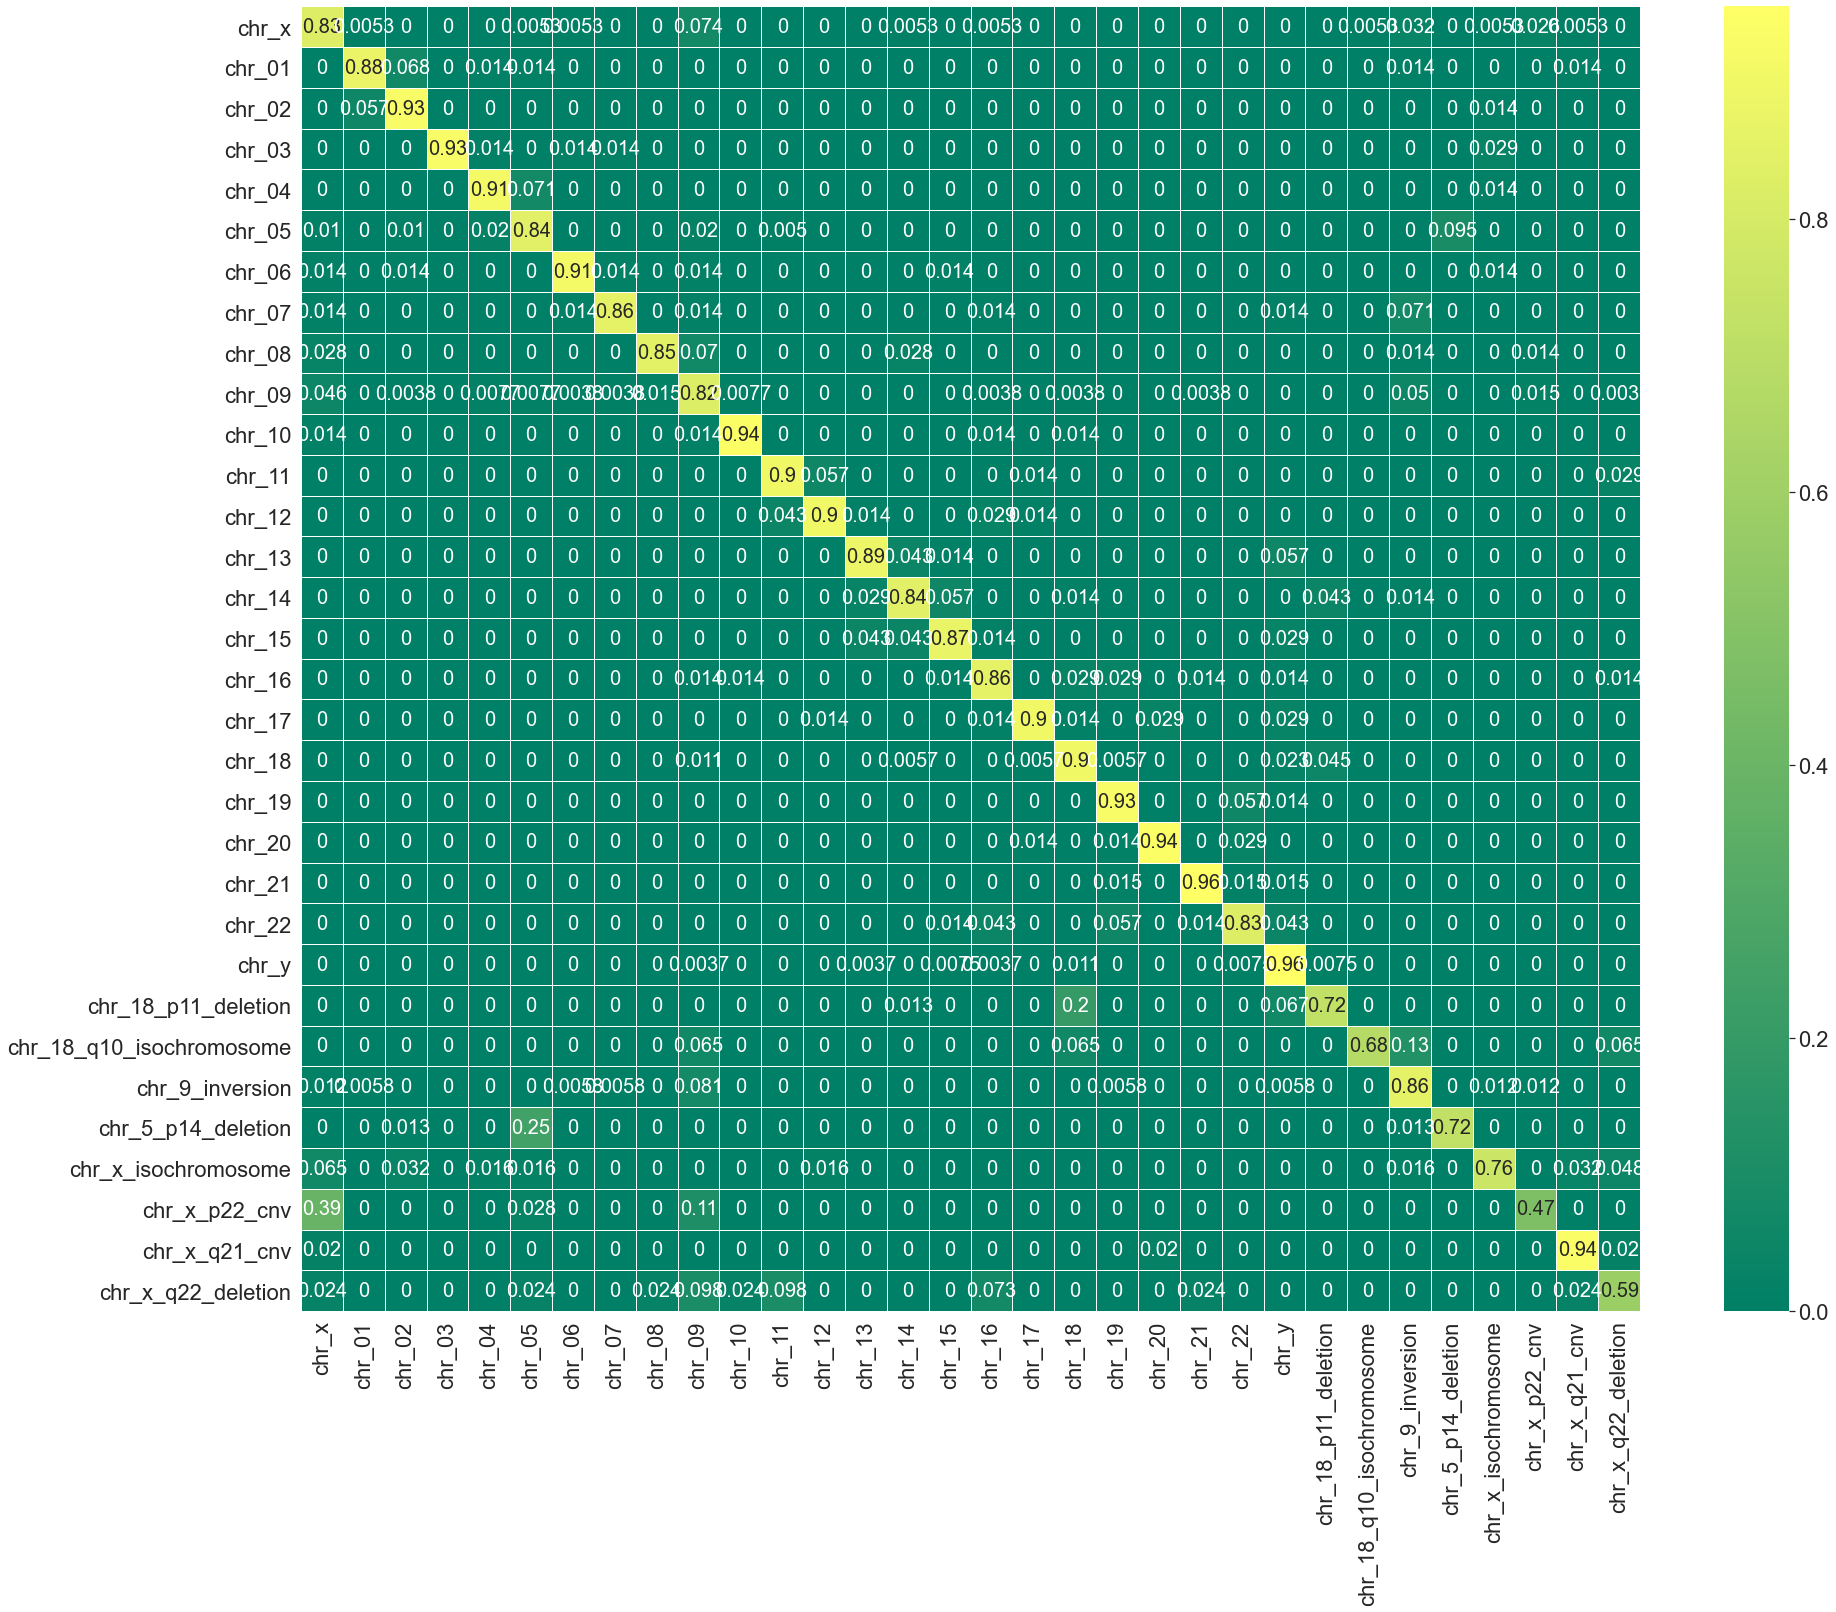

In [31]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 3)

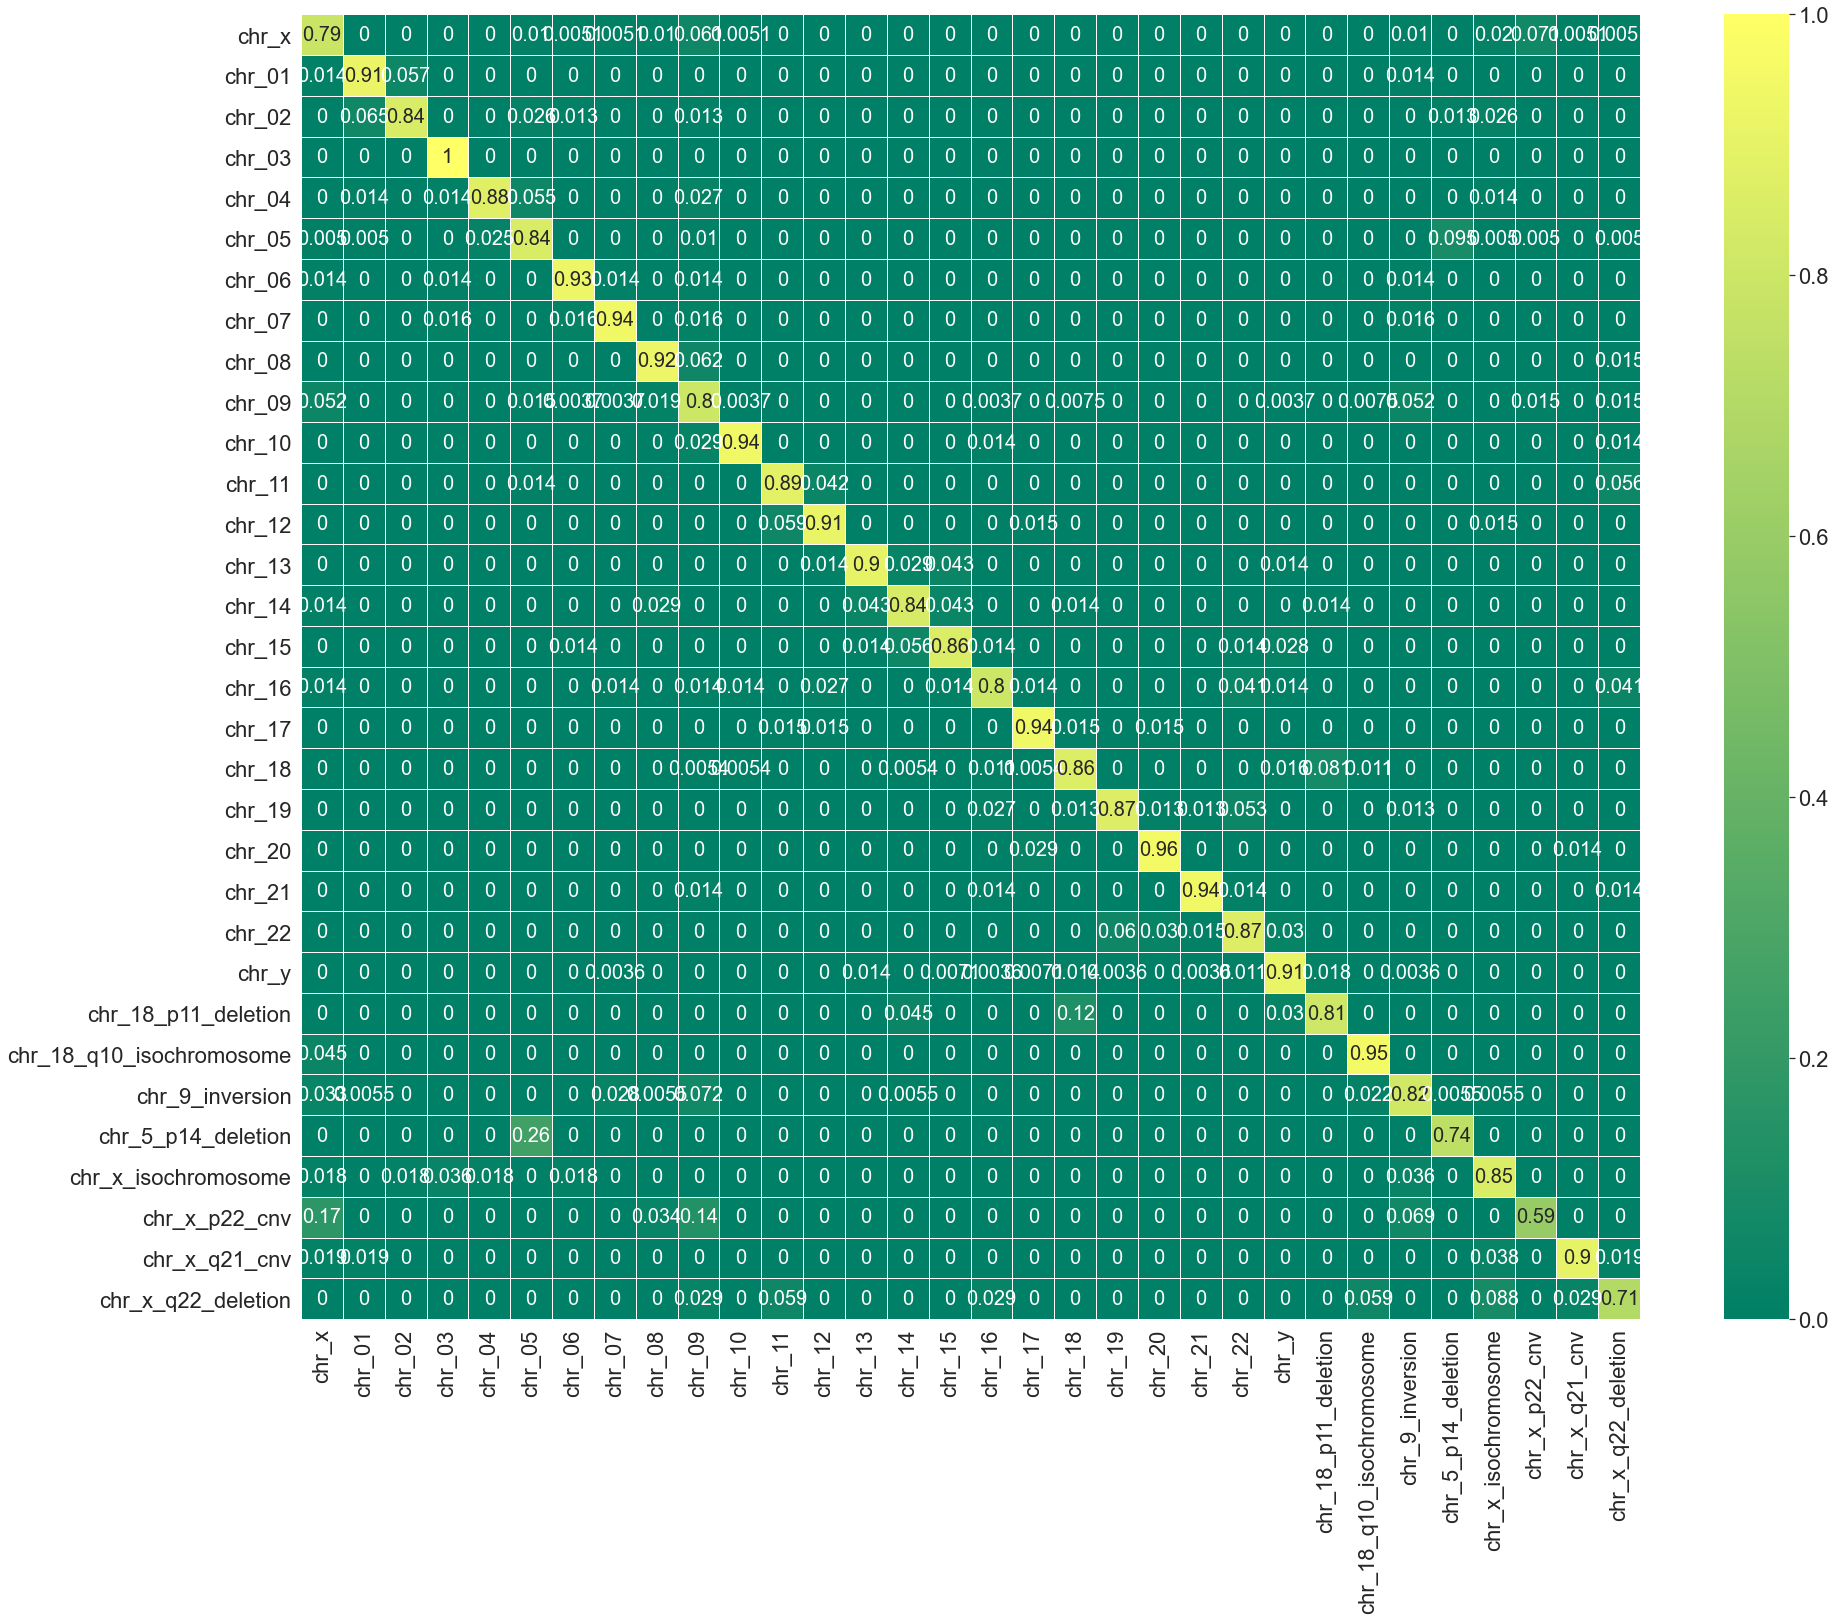

In [33]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 1)

In [34]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [35]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [36]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)